# DESI Quicksurvey 2016 Analysis

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from corrLSS.genrandom import make_random
from astropy.io import fits
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Look at Quciksurvey 2016 Gaussian Random Mock: ELG.fits

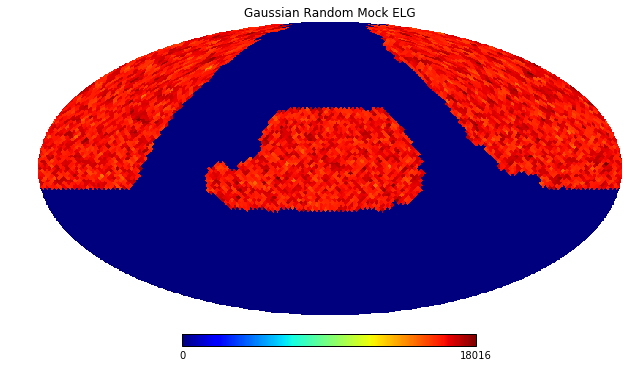

In [6]:
mockcat=fits.open('./mock/ELG.fits')
mockra=mockcat[1].data['ra']
mockdec=mockcat[1].data['dec']
from corrLSS.util import make_hpmap
mockmap=make_hpmap(ra=mockra,dec=mockdec)
hp.mollview(mockmap,title="Gaussian Random Mock ELG")
plt.show()

NSIDE = 32
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


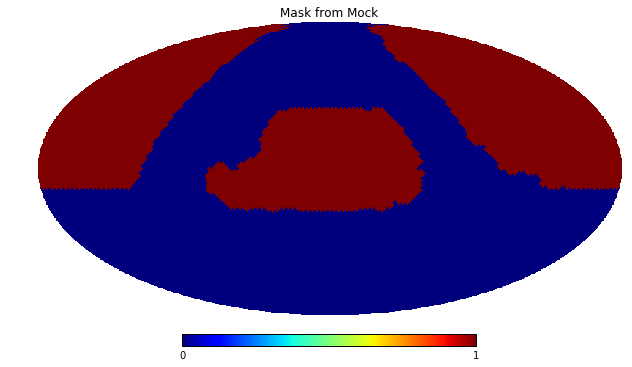

In [5]:
mask=hp.read_map('./mock/mask_mock.fits')
hp.mollview(mask,title="Mask from Mock")
plt.show()

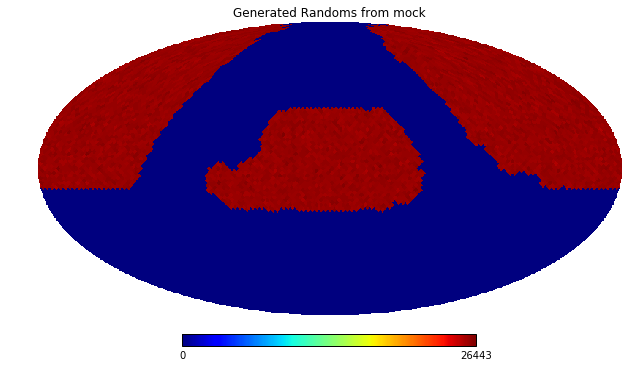

In [15]:
random=fits.open('./mock/random_ELG.fits')
rndra=random[1].data['ra']
rnddec=random[1].data['dec']
from corrLSS.util import make_hpmap
rndmap=make_hpmap(ra=rndra,dec=rnddec)
hp.mollview(rndmap,title="Generated Randoms from mock")
plt.show()


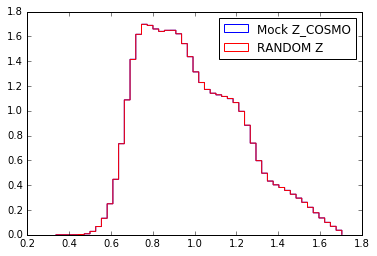

In [24]:
randz=random[1].data['Z']
mockz=mockcat[1].data['Z_COSMO']
plt.hist(mockz,50,histtype='step',normed=True,color='blue',label='Mock Z_COSMO')
plt.hist(randz,50,histtype='step',normed=True,color='red',label='RANDOM Z')
plt.legend()
plt.show()

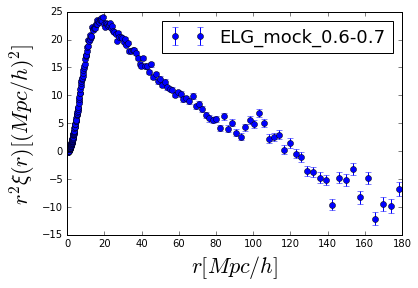

In [11]:
from regress_gp import plot_xi,read_2pt
r,xi,xi_var=read_2pt('mock/elg_0.6_0.7.fits')
plot_xi(r,xi,xi_var,fit=False,label='ELG_mock_0.6-0.7')

# Look at Truth.fits after selection

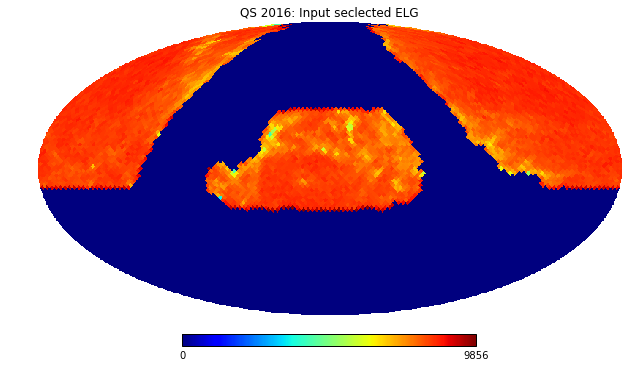

In [19]:
truth=fits.open('input/truth.fits')
stype=truth[1].data['SOURCETYPE']
k=np.where(stype=='ELG')[0]
trura=truth[1].data['RA'][k]
trudec=truth[1].data['DEC'][k]
trumap=make_hpmap(ra=trura,dec=trudec)
hp.mollview(trumap,title="QS 2016: Input seclected Truth ELGs")
plt.show()

NSIDE = 32
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


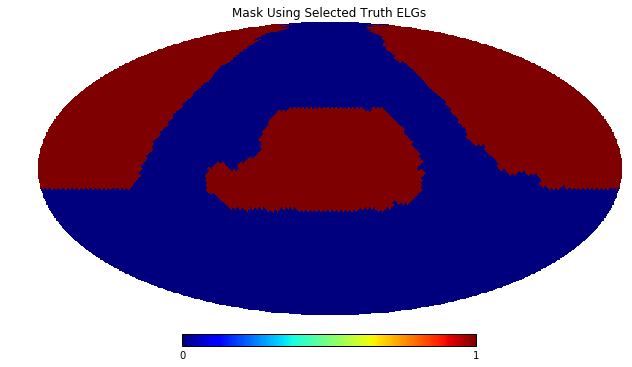

In [20]:
trumask=hp.read_map('./input/mask_input_elg.fits')
hp.mollview(trumask,title="Mask Using Selected Truth ELGs")
plt.show()

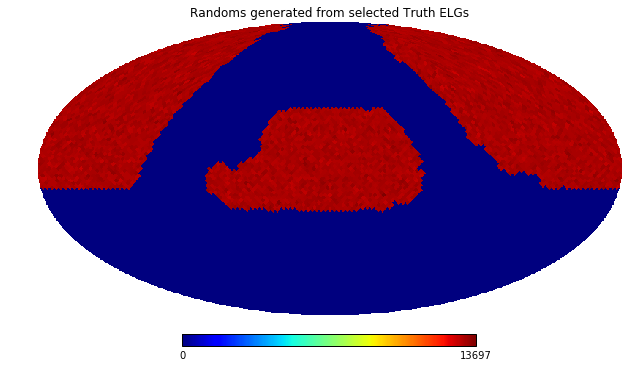

In [21]:
trurnd=fits.open('input/random_input_elg.fits')
trndra=trurnd[1].data['RA']
trnddec=trurnd[1].data['DEC']
maptrnd=make_hpmap(ra=trndra,dec=trnddec)
hp.mollview(maptrnd,title="Randoms generated from selected Truth ELGs")
plt.show()

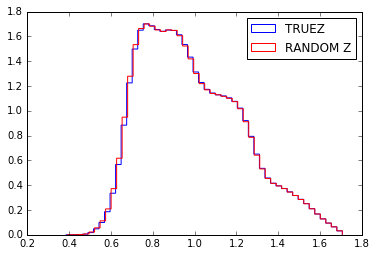

In [25]:
truz=truth[1].data['TRUEZ'][k]
rndz=trurnd[1].data['Z']
plt.hist(truz,50,histtype='step',normed=True,color='blue',label='TRUEZ')
plt.hist(rndz,50,histtype='step',normed=True,color='red',label='RANDOM Z')
plt.legend()
plt.show()

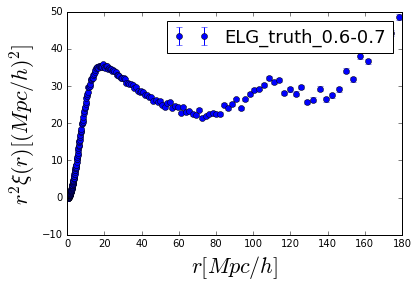

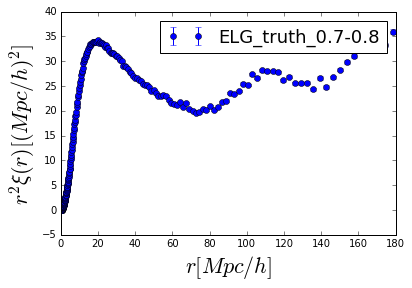

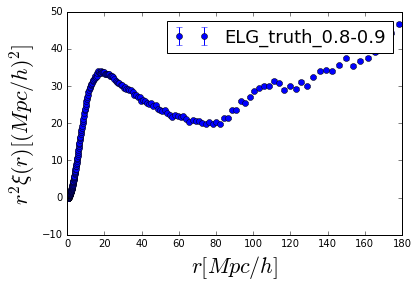

In [23]:
r1,xi1,xi_var1=read_2pt('input/treecorr_output_elg_0.6-0.7.fits')
plot_xi(r1,xi1,xi_var1,fit=False,label='ELG_truth_0.6-0.7')
r2,xi2,xi_var2=read_2pt('input/treecorr_output_elg_0.7-0.8.fits')
plot_xi(r2,xi2,xi_var2,fit=False,label='ELG_truth_0.7-0.8')
r3,xi3,xi_var3=read_2pt('input/treecorr_output_elg_0.8-0.9.fits')
plot_xi(r3,xi3,xi_var3,fit=False,label='ELG_truth_0.8-0.9')
